# Import software libraries and load the dataset

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))

# Load the dataset.
month_acc = pd.read_csv('../data/daily_accounting_by_month.csv',
                        index_col = 0, header = [0, 1])
print('\nLoaded dataset.')

# Format floats with comma in thousands place
pd.options.display.float_format = '{:,.2f}'.format

Libraries used in this project:
- Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.22.3
- pandas 1.4.3
- Matplotlib 3.5.1

Loaded dataset.


# Generate a modular plot showing revenue for both January and February

In [2]:
month_acc.head(10)

Revenue                       COGS                   GrossIncome  \
      January February    March  January February    March     January   
Date                                                                     
1    4,519.22 2,328.13 2,508.92 4,365.20 2,243.63 2,402.36      154.02   
2    1,852.86 3,905.34 6,247.91 1,790.87 3,758.41 6,007.21       61.99   
3    1,979.17 5,207.55 4,622.07 1,912.05 4,968.73 4,456.87       67.12   
4    1,546.37 2,323.33 3,708.99 1,475.36 2,228.72 3,564.98       71.01   
5    3,368.27 2,886.79 5,934.17 3,256.40 2,777.05 5,714.64      111.87   
6    3,442.10 2,767.07 2,945.33 3,295.05 2,671.94 2,826.71      147.05   
7    2,699.28 6,884.01 1,369.77 2,596.96 6,599.44 1,316.44      102.32   
8    5,041.65 4,842.53 2,976.56 4,848.61 4,655.42 2,858.24      193.04   
9    2,436.11 3,116.09 7,118.14 2,350.42 3,002.26 6,883.06       85.69   
10   3,391.38 2,991.45 3,012.60 3,268.03 2,892.65 2,899.90      123.35   

                      
     February  March  
Date                  
1       84.50 106.56  
2      146.93 240.70  
3      238.82 165.20  
4       94.61 144.01  
5      109.74 219.53  
6       95.13 118.62  
7      284.57  53.33  
8      187.11 118.32  
9      113.83 235.08  
10      98.80 112.70

In [3]:
print(month_acc.index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date')


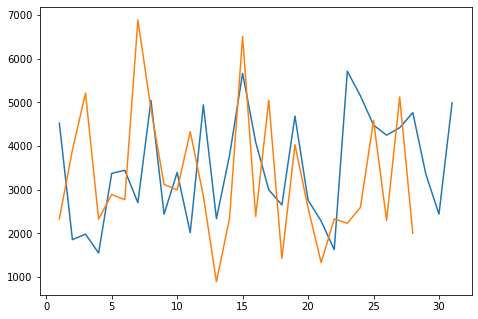

In [4]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(month_acc.index, month_acc.loc[:, ('Revenue', 'January')])
ax.plot(month_acc.index, month_acc.loc[:, ('Revenue', 'February')])

# Generate subplots comparing revenue across the months

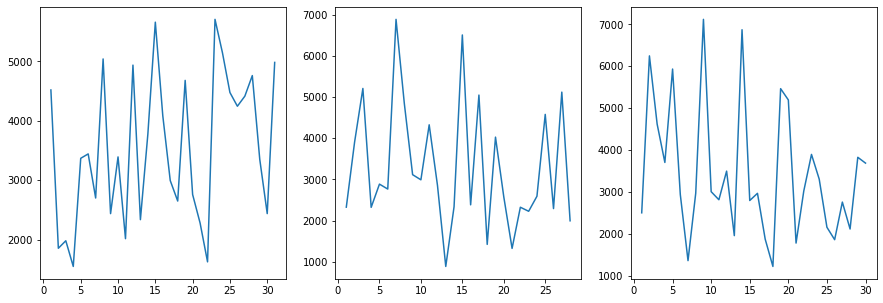

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(month_acc.index, month_acc.loc[:, ('Revenue', 'January')])
ax[1].plot(month_acc.index, month_acc.loc[:, ('Revenue', 'February')])
ax[2].plot(month_acc.index, month_acc.loc[:, ('Revenue', 'March')])

# Generate subplots comparing performance for January vs. February

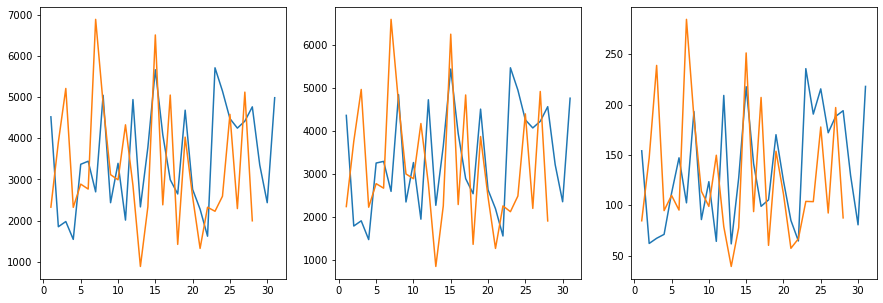

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

measures = ['Revenue', 'COGS', 'GrossIncome']

col = 0

for measure in measures:
    ax[col].plot(month_acc.index, month_acc.loc[:, (measure, 'January')])
    ax[col].plot(month_acc.index, month_acc.loc[:, (measure, 'February')])
    col += 1

# Generate subplots with shared axes

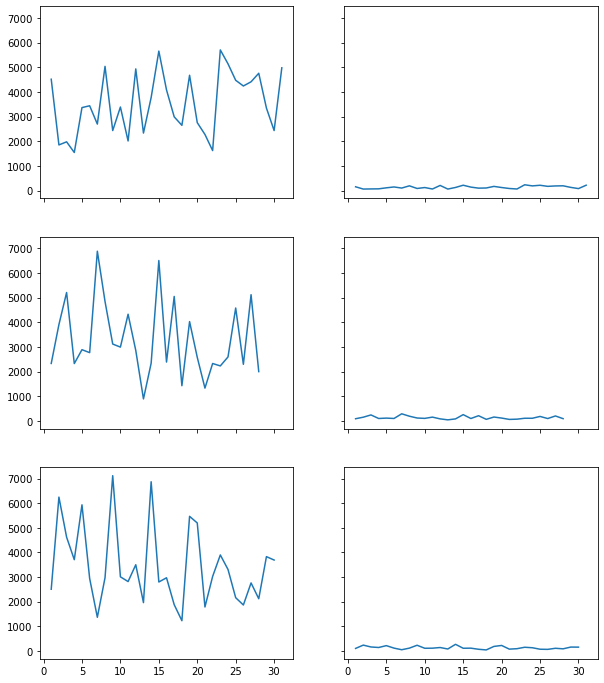

In [9]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey = 'all',
                       figsize = (10, 12))

months = ['January', 'February', 'March']
row = 0

for month in months:
    ax[row, 0].plot(month_acc.index,
                    month_acc.loc[:, ('Revenue', month)])
    ax[row, 1].plot(month_acc.index,
                    month_acc.loc[:, ('GrossIncome', month)])
    row += 1

# Generate more complex subplots using a `GridSpec` object

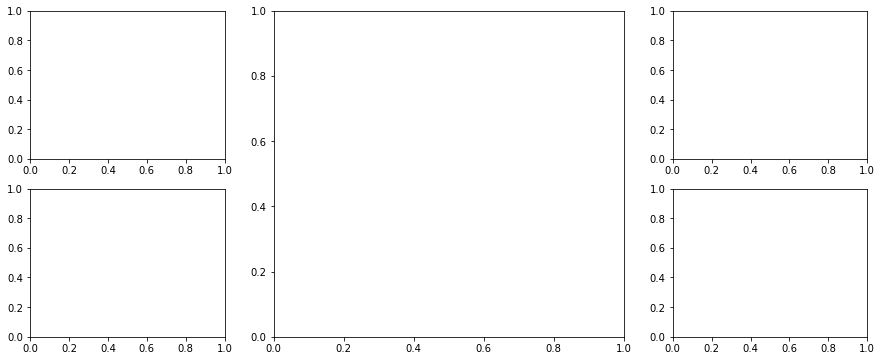

In [10]:
# Set up grid before plotting.
fig = plt.figure(figsize = (15, 6))
grid = fig.add_gridspec(2, 3, width_ratios = [.25, .45, .25])

ax_l1 = fig.add_subplot(grid[0, 0])
ax_l2 = fig.add_subplot(grid[1, 0])
ax_mid = fig.add_subplot(grid[:, 1])
ax_r1 = fig.add_subplot(grid[0, 2])
ax_r2 = fig.add_subplot(grid[1, 2])

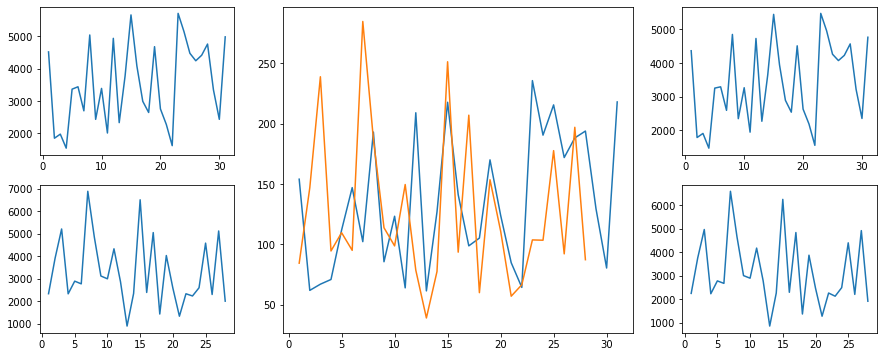

In [11]:
ax_l1.plot(month_acc.index, month_acc.loc[:, ('Revenue', 'January')])
ax_l2.plot(month_acc.index, month_acc.loc[:, ('Revenue', 'February')])
ax_mid.plot(month_acc.index, month_acc.loc[:, ('GrossIncome', 'January')])
ax_mid.plot(month_acc.index, month_acc.loc[:, ('GrossIncome', 'February')])
ax_r1.plot(month_acc.index, month_acc.loc[:, ('COGS', 'January')])
ax_r2.plot(month_acc.index, month_acc.loc[:, ('COGS', 'February')])
fig